In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, MaxPooling1D, Flatten
from keras.models import Sequential
import os
from keras.layers import Dense, Activation, LSTM, Dropout
from sklearn.model_selection import GridSearchCV
import joblib
# import rc
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# how to use .h5 file
# https://www.tensorflow.org/tutorials/keras/save_and_load


import warnings
warnings.filterwarnings('ignore')

ARIMA 모델 사용

* 경유가격

In [2]:
# 모든 데이터를 합친 데이터(정리된 데이터)
data = pd.read_csv('data/merge_all/merge_drop.csv')

In [3]:
#  거래년월일 컬럼을 2022-10-30 까지만 사용
train = data[data['거래년월일'] <= '2022-09-31']
#y_train = data[data['거래년월일'] <= '2022-10-31']

#  거래년월일 컬럼을 2022-10-30 일부터 사용
test = data[data['거래년월일'] > '2022-09-31']
#y_test = data[data['거래년월일'] > '2022-10-31']

In [4]:
# arima 모델로 예측해보기
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#------------------------------------------
data1 = train[['거래년월일', '자동차용 경유 가격 (원)']]
data1.index = data1.거래년월일
dt = data1.drop('거래년월일', axis=1)

data2 = test[['거래년월일', '자동차용 경유 가격 (원)']]
data2.index = data2.거래년월일
test_dt = data2.drop('거래년월일', axis=1)

In [5]:

model_arima = ARIMA(dt, order=(1,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

c:\Users\hyha1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hyha1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hyha1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         자동차용 경유 가격 (원)   No. Observations:                 5741
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -21440.455
Date:                Fri, 06 Jan 2023   AIC                          42886.910
Time:                        11:13:53   BIC                          42906.875
Sample:                             0   HQIC                         42893.859
                               - 5741                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0102      0.015      0.679      0.497      -0.019       0.040
ma.L1         -0.9982      0.001  -1822.688      0.000      -0.999      -0.997
sigma2       102.8207      0.182    563.428      0.0

In [8]:
model_pred = model_arima_fit.forecast(steps=60)

c:\Users\hyha1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [7]:
test_dt

,자동차용 경유 가격 (원)
거래년월일,
2022-10-04,1838.34
2022-10-05,1838.34
2022-10-06,1838.34
2022-10-07,1838.34
2022-10-11,1838.34
2022-10-12,1838.34
2022-10-13,1838.34
2022-10-14,1838.34
2022-10-17,1838.34


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


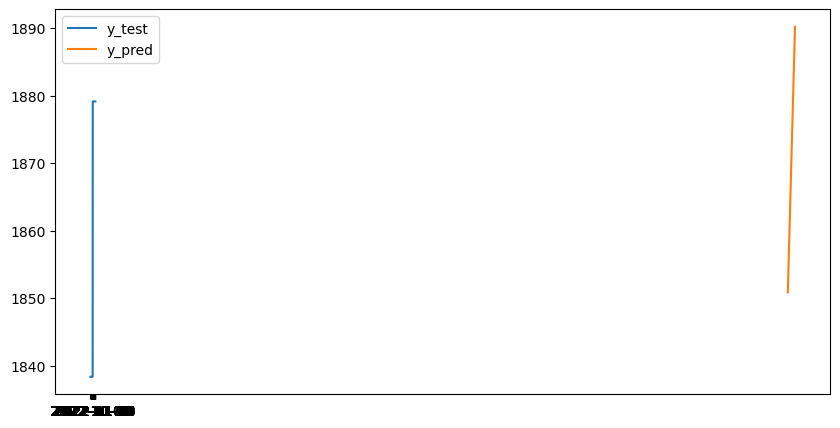

In [10]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(test_dt, label='y_test')
plt.plot(model_pred, label='y_pred')
plt.legend()
plt.show()